In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd /content
!git clone https://github.com/ultralytics/yolov5
%cd yolov5
%pip install -qr requirements.txt

import yaml, torch
from IPython.display import Image, clear_output

/content
Cloning into 'yolov5'...
remote: Enumerating objects: 15897, done.
remote: Counting objects: 100% (17/17), done.
remote: Compressing objects: 100% (16/16), done.
remote: Total 15897 (delta 5), reused 3 (delta 1), pack-reused 15880
Receiving objects: 100% (15897/15897), 14.62 MiB | 20.77 MiB/s, done.
Resolving deltas: 100% (10900/10900), done.
/content/yolov5
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 188.5/188.5 kB 4.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 614.4/614.4 kB 1.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 7.8 MB/s eta 0:00:00


In [3]:
%mkdir /content/yolov5/pothole
%cd /content/yolov5/pothole

/content/yolov5/pothole


In [5]:
# 링크에서 데이터 다운 + 압축 해제 후 zip파일 삭제
!curl -L "https://public.roboflow.com/ds/gQzUoQxrMh?key=GEHYqArQti" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100   901  100   901    0     0   2850      0 --:--:-- --:--:-- --:--:--  2851
100 46.0M  100 46.0M    0     0  17.1M      0  0:00:02  0:00:02 --:--:-- 27.7M
Archive:  roboflow.zip
 extracting: README.dataset.txt      
 extracting: README.roboflow.txt     
 extracting: data.yaml               
   creating: test/
   creating: test/images/
 extracting: test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg  
 extracting: test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg  
 extracting: test/images/img-146_jpg.rf.61be25b3053a51f622a244980545df2b.jpg  
 extracting: test/images/img-161_jpg.rf.211541e7178a4a93ec0680f26b905427.jpg  
 extracting: test/images/img-168_jpg.rf.af3590e07b06b43e91fa53990ff94af3.jpg  
 extracting: test/images/img-179_jpg.rf.8632eb0d9b75fefe144829e67b75015a.jpg  
 extracting: test/images/img

In [6]:
!ls

data.yaml  README.dataset.txt  README.roboflow.txt  test  train  valid


In [7]:
from glob import glob

train_img_list = glob('/content/yolov5/pothole/train/images/*.jpg')
valid_img_list = glob('/content/yolov5/pothole/valid/images/*.jpg')
test_img_list = glob('/content/yolov5/pothole/test/images/*.jpg')

print(len(train_img_list), len(valid_img_list), len(test_img_list))

465 133 67


In [8]:
train_img_list[0:3]

['/content/yolov5/pothole/train/images/img-321_jpg.rf.663ad0ed3ef90b48f212d451aa82aba9.jpg',
 '/content/yolov5/pothole/train/images/img-470_jpg.rf.c1aa523b26fb96e39f98ab0eaef42516.jpg',
 '/content/yolov5/pothole/train/images/img-489_jpg.rf.f4699ee74f2e8fb7170294124cc4fbb6.jpg']

### 커스텀매직

In [12]:
# register_line_cell_magic 데코레이터를 이용하여 커스텀 메직 함수인 wirtetemplate을 정의
# line: 파일 이름으로 사용될 문자열입니다
# cell: 쓰여질 파일의 내용으로 사용될 문자열입니다
from IPython.core.magic import register_line_cell_magic

@register_line_cell_magic # decorator
def writetemplate(line, cell):
    with open(line, 'w') as f:
        f.write(cell.format(**globals()))

In [13]:
import yaml
%cat /content/yolov5/pothole/data.yaml

train: ../train/images
val: ../valid/images

nc: 1
names: ['pothole']

In [14]:
%%writetemplate /content/yolov5/pothole/data.yaml
train: ./pothole/train/images
val: ./pothole/valid/images
test: ./pothole/test/images

nc: 1
names: ['pothole']

In [15]:
# 파일 내용이 수정된 걸 볼 수 있음
%cat /content/yolov5/pothole/data.yaml

train: ./pothole/train/images
val: ./pothole/valid/images
test: ./pothole/test/images

nc: 1
names: ['pothole']


In [17]:
with open('/content/yolov5/pothole/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

print(num_classes)

1


In [16]:
# 모델 구성
with open('/content/yolov5/pothole/data.yaml', 'r') as stream:
    num_classes = str(yaml.safe_load(stream)['nc'])

%cat /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 80  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [18]:
%%writetemplate /content/yolov5/models/yolov5s.yaml

# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: {num_classes}  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]],  # cat backbone P3
   [-1, 3, C3, [256, False]],  # 17 (P3/8-small)

   [-1, 1, Conv, [256, 3, 2]],
   [[-1, 14], 1, Concat, [1]],  # cat head P4
   [-1, 3, C3, [512, False]],  # 20 (P4/16-medium)

   [-1, 1, Conv, [512, 3, 2]],
   [[-1, 10], 1, Concat, [1]],  # cat head P5
   [-1, 3, C3, [1024, False]],  # 23 (P5/32-large)

   [[17, 20, 23], 1, Detect, [nc, anchors]],  # Detect(P3, P4, P5)
  ]

In [19]:
%cat /content/yolov5/models/yolov5s.yaml


# YOLOv5 🚀 by Ultralytics, AGPL-3.0 license

# Parameters
nc: 1  # number of classes
depth_multiple: 0.33  # model depth multiple
width_multiple: 0.50  # layer channel multiple
anchors:
  - [10,13, 16,30, 33,23]  # P3/8
  - [30,61, 62,45, 59,119]  # P4/16
  - [116,90, 156,198, 373,326]  # P5/32

# YOLOv5 v6.0 backbone
backbone:
  # [from, number, module, args]
  [[-1, 1, Conv, [64, 6, 2, 2]],  # 0-P1/2
   [-1, 1, Conv, [128, 3, 2]],  # 1-P2/4
   [-1, 3, C3, [128]],
   [-1, 1, Conv, [256, 3, 2]],  # 3-P3/8
   [-1, 6, C3, [256]],
   [-1, 1, Conv, [512, 3, 2]],  # 5-P4/16
   [-1, 9, C3, [512]],
   [-1, 1, Conv, [1024, 3, 2]],  # 7-P5/32
   [-1, 3, C3, [1024]],
   [-1, 1, SPPF, [1024, 5]],  # 9
  ]

# YOLOv5 v6.0 head
head:
  [[-1, 1, Conv, [512, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 6], 1, Concat, [1]],  # cat backbone P4
   [-1, 3, C3, [512, False]],  # 13

   [-1, 1, Conv, [256, 1, 1]],
   [-1, 1, nn.Upsample, [None, 2, 'nearest']],
   [[-1, 4], 1, Concat, [1]

In [27]:
%cd ..
!pwd

/content/yolov5


In [28]:
# 검증(미리 만들어둔 모델 사용)
!python val.py --weights '/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt' --data ./pothole/data.yaml --img 640 --iou 0.6 --half

val: data=./pothole/data.yaml, weights=['/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=True, dnn=False
YOLOv5 🚀 v7.0-207-gdf48c20 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
100% 755k/755k [00:00<00:00, 44.5MB/s]
val: Scanning /content/yolov5/pothole/valid/labels... 133 images, 0 backgrounds, 0 corrupt: 100% 133/133 [00:00<00:00, 2953.56it/s]
val: New cache created: /content/yolov5/pothole/valid/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 5/5 [00:06<00:00,  1.34s/it]
                   all        133        330      0.722      0.

In [29]:
# 테스트 데이터
!python val.py --weights '/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt' --data ./pothole/data.yaml --img 640 --task test

val: data=./pothole/data.yaml, weights=['/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt'], batch_size=32, imgsz=640, conf_thres=0.001, iou_thres=0.6, max_det=300, task=test, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v7.0-207-gdf48c20 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
test: Scanning /content/yolov5/pothole/test/labels... 67 images, 0 backgrounds, 0 corrupt: 100% 67/67 [00:00<00:00, 2598.39it/s]
test: New cache created: /content/yolov5/pothole/test/labels.cache
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 3/3 [00:03<00:00,  1.00s/it]
                   all         67        154      0.754      0.636      0.729      0.388
Speed: 0.4ms p

In [30]:
!python detect.py --weights '/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt' --data ./pothole/data.yaml --img 640 --conf 0.4 --source ./pothole/test/images

detect: weights=['/content/drive/MyDrive/김나영/[11] 객체탐지 (1)/model/best.pt'], source=./pothole/test/images, data=./pothole/data.yaml, imgsz=[640, 640], conf_thres=0.4, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 v7.0-207-gdf48c20 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
YOLOv5s summary: 157 layers, 7012822 parameters, 0 gradients, 15.8 GFLOPs
image 1/67 /content/yolov5/pothole/test/images/img-105_jpg.rf.3fe9dff3d1631e79ecb480ff403bcb86.jpg: 640x640 1 pothole, 11.5ms
image 2/67 /content/yolov5/pothole/test/images/img-107_jpg.rf.2e40485785f6e5e2efec404301b235c2.jpg: 640x640 1 pothole, 11.5ms
image 3/67 /content/yolov5/pothole/test/images/img-146

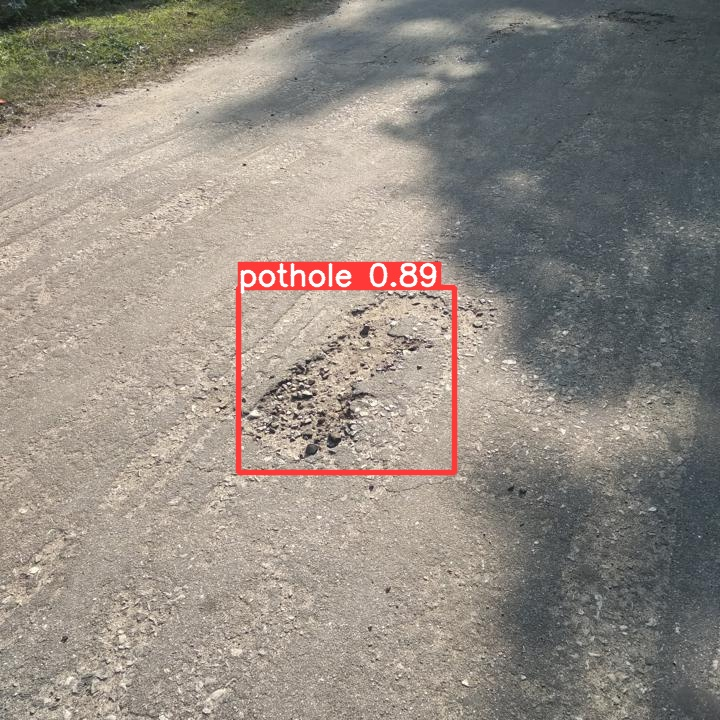

In [32]:
import glob, random
from IPython.display import Image, display

image_name = random.choice(glob.glob('/content/yolov5/runs/detect/exp/*.jpg'))
display(Image(filename=image_name))